# Notebook to serve as baseline to re-write shearAzimuthalAverager
## build on : data_and_model_demo_DC2

### created by Mijin, Lucie & Marina
################################################################

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import clmm.polaraveraging
import clmm

### Read in the data (here cosmoDC2)

In [3]:
cosmo_object_type = "astropy"
try:
    import pyccl
except:
    cosmo_object_type = "astropy"
if cosmo_object_type == "astropy":
    from astropy.cosmology import FlatLambdaCDM
    cosmo = FlatLambdaCDM(70., Om0 = 0.3) # astropy cosmology setting, will be replaced by ccl
elif cosmo_object_type == "ccl":
    import pyccl as ccl
    cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b = 0.05,h = 0.7,n_s = 0.97, sigma8 = 0.8, Omega_k = 0.)

In [4]:
cl = clmm.load_cluster('9687686568.p')

In [5]:
ra_l = cl.ra
dec_l = cl.dec
z = cl.z

e1 = cl.galcat['e1']
e2 = cl.galcat['e2']

ra_s = cl.galcat['ra']
dec_s = cl.galcat['dec']

In [8]:
theta, g_t , g_x = clmm.polaraveraging._compute_shear(ra_l, dec_l, ra_s, dec_s, e1, e2, sky = "flat")  #calculate distance and tangential shear and cross shear for each source galaxy
#theta, g_t , g_x = compute_shear(ra_l, dec_l, ra_s, dec_s, e1, e2, sky = "curved") #curved sky

In [9]:
rMpc = clmm.polaraveraging._theta_units_conversion(theta,"Mpc",z,cosmo,cosmo_object_type=cosmo_object_type)

In [10]:
r, gt_proflie, gterr_proflie = clmm.polaraveraging._compute_radial_averages(rMpc, g_t)

TypeError: g must be an array

In [ ]:
r, gx_proflie, gxerr_proflie = clmm.polaraveraging._compute_radial_averages(rMpc, g_x)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11207ba50>)

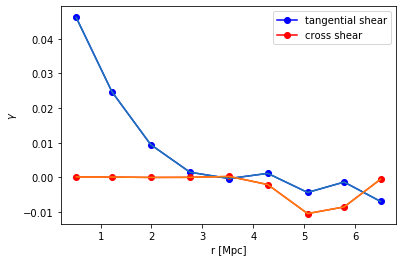

In [13]:
polaraveraging._plot_profiles(r, gt_proflie, gterr_proflie,gx_proflie,gxerr_proflie, "Mpc")

In [14]:
bins =polaraveraging.make_bins(0.1, 3.7,20)   #make new binning range
#print (bins)

In [15]:
r, gt_proflie, gterr_proflie = polaraveraging._compute_radial_averages(rMpc, g_t, bins=bins)

In [17]:
r, gx_proflie, gxerr_proflie = polaraveraging._compute_radial_averages(rMpc, g_x, bins=bins)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10e1f6cd0>)

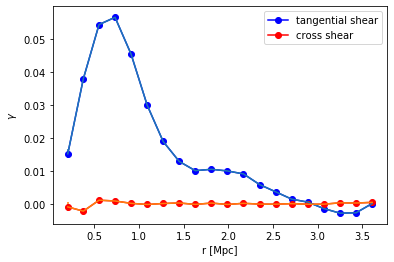

In [18]:
polaraveraging._plot_profiles(r, gt_proflie, gterr_proflie,gx_proflie,gxerr_proflie, "Mpc")

Text(0, 0.5, '$\\gamma$')

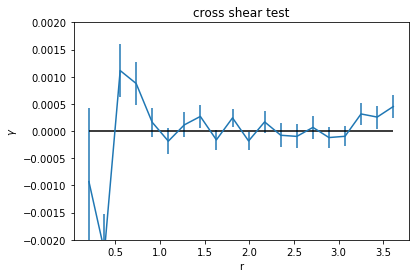

In [22]:
plt.title('cross shear test')
plt.errorbar(r,gx_proflie, gxerr_proflie)
plt.title('cross shear test')
plt.ylim(-0.002,0.002)
plt.hlines(0.,np.min(r), np.max(r))
plt.xlabel("r")
plt.ylabel('$\\gamma$')